In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt

In [13]:
#ETL
df = pd.read_csv('data/Allyears-market-region-hab-data.csv')

df.columns = df.columns.str.strip()

filtered_df = df[df['Geography'] == 'Total U.S.']

filtered_df

,Geography,Period,2020Units,2021Units,2022Units,2023Units,2020Dollars,2021Dollars,2022Dollars,2023Dollars,2020ASP,2021ASP,2022ASP,2023ASP
0,Total U.S.,1,193716227.0,204264892.7,162585783.0,169761056.5,186384248.3,190571271.8,204974123.0,176028113.3,0.962151,0.932961,1.260714,1.036917
59,Total U.S.,2,167478433.7,209960919.7,171581445.7,177325916.2,178709336.9,189459258.1,221506804.5,179134236.0,1.067059,0.902355,1.290972,1.010198
118,Total U.S.,3,176882274.9,194525882.7,149325877.3,174021676.0,216132586.1,196754282.5,210335915.7,173999277.8,1.221901,1.011456,1.408570,0.999871
177,Total U.S.,4,184998785.2,181530343.5,152694485.1,173137933.1,227587639.3,212087765.0,220713727.9,179758886.2,1.230212,1.168332,1.445460,1.038241
236,Total U.S.,5,213395671.2,193165563.4,154431703.1,180601049.7,247560362.2,215769774.7,231567334.9,187990158.6,1.160100,1.117020,1.499481,1.040914
295,Total U.S.,6,206834060.5,184140053.7,146974774.7,169155884.9,234511516.5,212467140.7,226077848.7,182279120.0,1.133815,1.153834,1.538209,1.077581
354,Total U.S.,7,198499962.8,184697630.8,144988303.3,158123965.8,218277644.6,202547377.8,214489658.5,185258957.9,1.099636,1.096643,1.479358,1.171606
413,Total U.S.,8,190574137.3,173144965.8,149137933.3,148021387.4,200528848.2,190824355.4,200651577.8,185167852.9,1.052235,1.102107,1.345409,1.250953
472,Total U.S.,9,187953345.7,167475049.3,150891143.6,155988480.4,190417207.4,188775413.0,186740672.6,180376169.3,1.013109,1.127185,1.237585,1.156343
531,Total U.S.,10,176891861.3,157607449.0,144322087.2,148110964.8,178478566.4,187241899.7,169350228.4,167046376.0,1.008970,1.188027,1.173419,1.127846


In [14]:
df = filtered_df

unit_columns = [col for col in df.columns if 'Units' in col]
dollar_columns = [col for col in df.columns if 'Dollars' in col]
asp_columns = [col for col in df.columns if 'ASP' in col]

units_df = pd.melt(df, id_vars=['Geography', 'Period'], value_vars=unit_columns,
                     var_name='Year', value_name='Units')
dollars_df = pd.melt(df, id_vars=['Geography', 'Period'], value_vars=dollar_columns,
                     var_name='Year', value_name='Dollars')
asp_df = pd.melt(df, id_vars=['Geography', 'Period'], value_vars=asp_columns,
                 var_name='Year', value_name='ASP')

units_df['Year'] = units_df['Year'].str.extract('(\d+)', expand=False)
dollars_df['Year'] = dollars_df['Year'].str.extract('(\d+)', expand=False)
asp_df['Year'] = asp_df['Year'].str.extract('(\d+)', expand=False)

merged_df = pd.merge(pd.merge(units_df, dollars_df, on=['Geography', 'Period', 'Year']),
                     asp_df, on=['Geography', 'Period', 'Year'])

merged_df = merged_df.sort_values(by=['Year', 'Period'])
merged_df.to_csv('data/merged_data.csv', index=False)

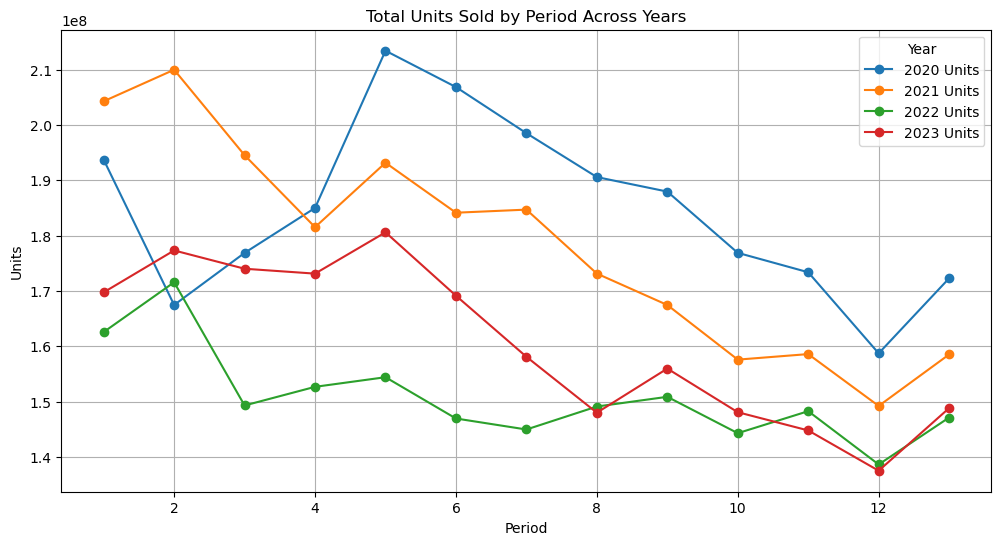

In [15]:
merged_df = pd.read_csv('data/merged_data.csv')
merged_df.columns = merged_df.columns.str.strip()

# Plot
plt.figure(figsize=(12, 6))

for year in merged_df['Year'].unique():
    subset = merged_df[merged_df['Year'] == year]
    plt.plot(subset['Period'], subset['Units'], marker='o', label=f'{year} Units')

plt.title('Total Units Sold by Period Across Years')
plt.xlabel('Period')
plt.ylabel('Units')
plt.legend(title='Year')
plt.grid(True)
plt.show()

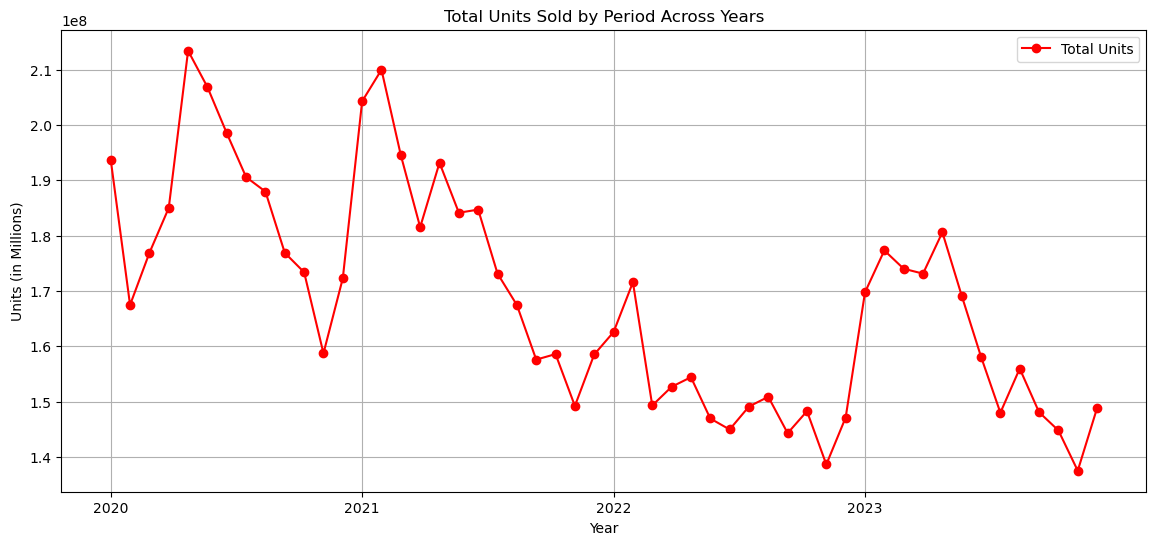

In [16]:
merged_df['Extended Period'] = (merged_df['Year'] - merged_df['Year'].min()) * 13 + merged_df['Period']

plt.figure(figsize=(14, 6))

# Plot units
plt.plot(merged_df['Extended Period'], merged_df['Units'], marker='o', linestyle='-', color='red', label='Total Units')


ticks = merged_df.groupby('Year')['Extended Period'].min().tolist()
labels = merged_df['Year'].unique()

plt.xticks(ticks, labels)  

plt.title('Total Units Sold by Period Across Years')
plt.xlabel('Year')
plt.ylabel('Units (in Millions)')
plt.grid(True)
plt.legend()
plt.show()

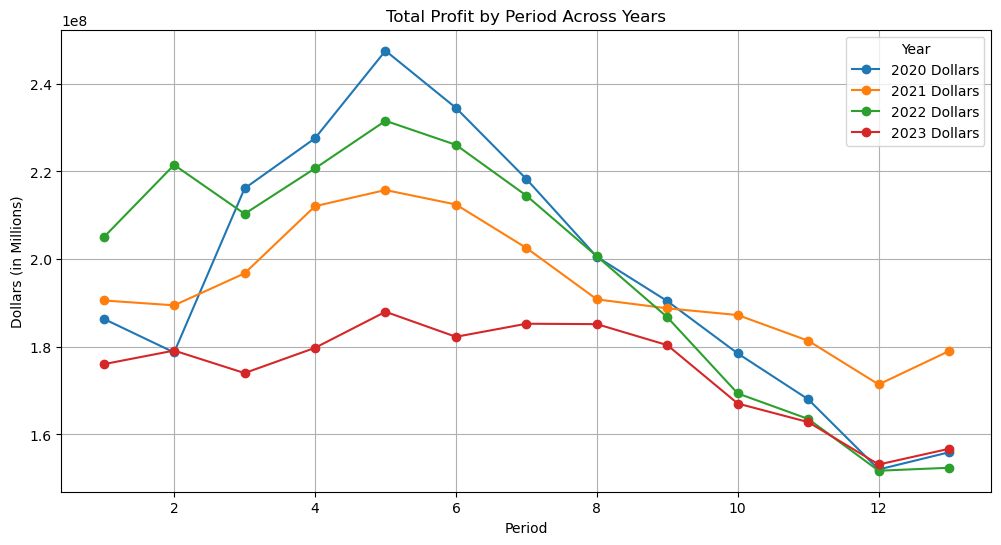

In [17]:
merged_df.columns = merged_df.columns.str.strip()

# Plot
plt.figure(figsize=(12, 6))

for year in merged_df['Year'].unique():
    subset = merged_df[merged_df['Year'] == year]
    plt.plot(subset['Period'], subset['Dollars'], marker='o', label=f'{year} Dollars')

plt.title('Total Profit by Period Across Years')
plt.xlabel('Period')
plt.ylabel('Dollars (in Millions)')
plt.legend(title='Year')
plt.grid(True)
plt.show()

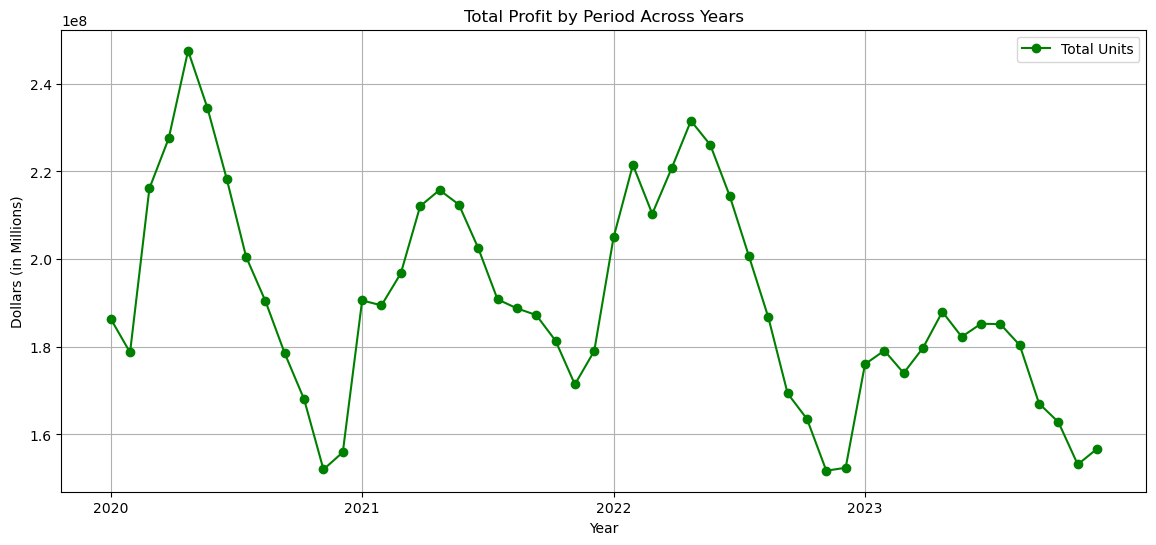

In [18]:
merged_df['Extended Period'] = (merged_df['Year'] - merged_df['Year'].min()) * 13 + merged_df['Period']

plt.figure(figsize=(14, 6))

# Plot dollars
plt.plot(merged_df['Extended Period'], merged_df['Dollars'], marker='o', linestyle='-', color='green', label='Total Units')

ticks = merged_df.groupby('Year')['Extended Period'].min().tolist()
labels = merged_df['Year'].unique()

plt.xticks(ticks, labels)  

plt.title('Total Profit by Period Across Years')
plt.xlabel('Year')
plt.ylabel('Dollars (in Millions)')
plt.grid(True)
plt.legend()
plt.show()

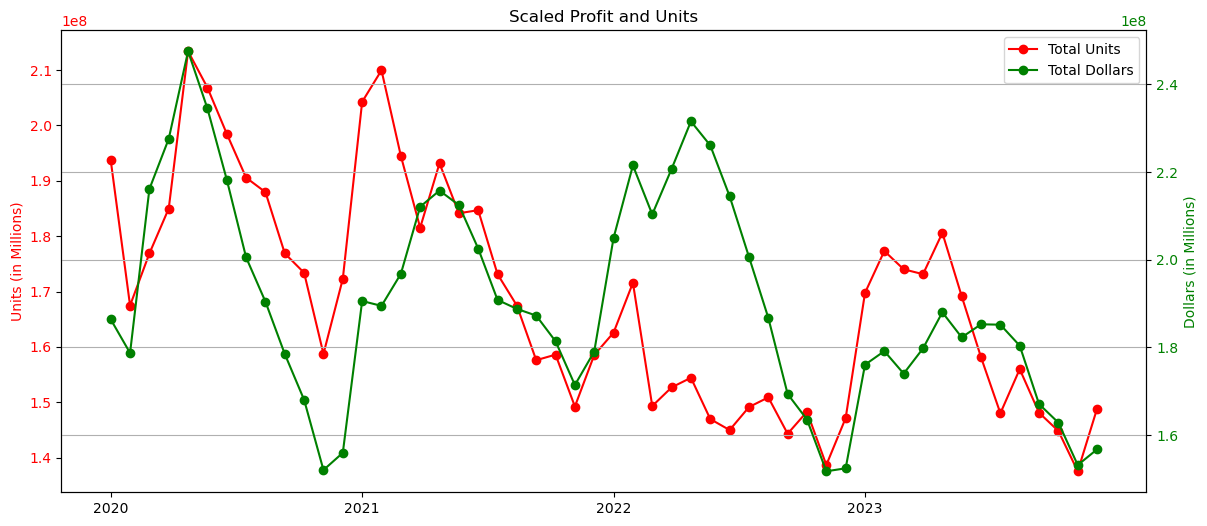

In [19]:
plt.figure(figsize=(14, 6))

# Plot units
ax1 = plt.gca()  
ax1.plot(merged_df['Extended Period'], merged_df['Units'], marker='o', linestyle='-', color='red', label='Total Units')
ax1.set_ylabel('Units (in Millions)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Plot dollars
ax2 = ax1.twinx()  
ax2.plot(merged_df['Extended Period'], merged_df['Dollars'], marker='o', linestyle='-', color='green', label='Total Dollars')
ax2.set_ylabel('Dollars (in Millions)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

ticks = merged_df.groupby('Year')['Extended Period'].min().tolist()
labels = merged_df['Year'].unique()

plt.xticks(ticks, labels)  

plt.title('Scaled Profit and Units')
plt.xlabel('Year')
plt.grid(True)

# Combine legends of both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.show()

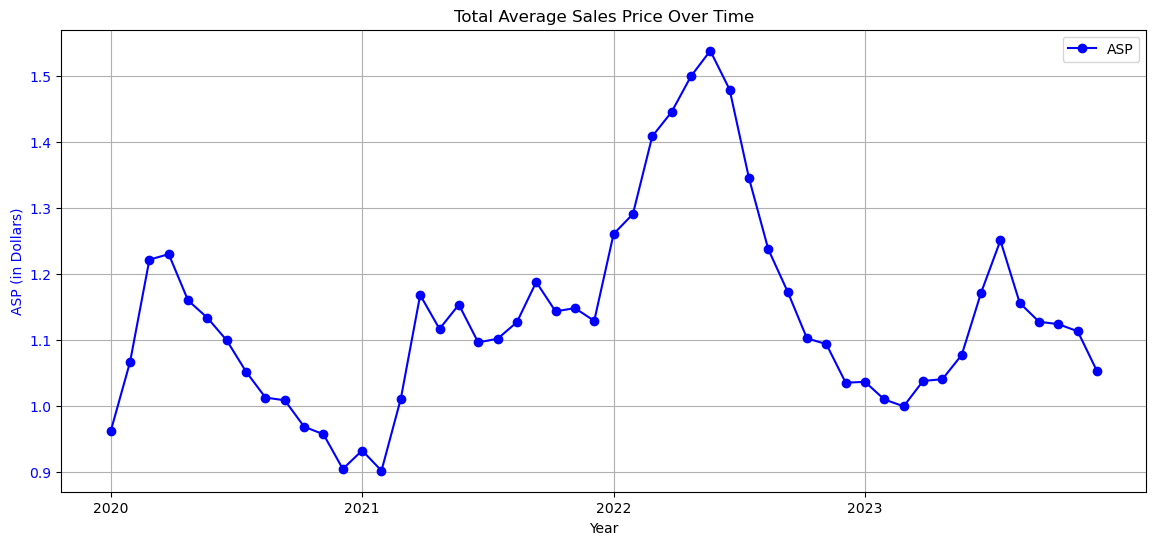

In [20]:
plt.figure(figsize=(14, 6))

# Plot
ax2 = plt.gca()  
ax2.plot(merged_df['Extended Period'], merged_df['ASP'], marker='o', linestyle='-', color='blue', label='ASP')
ax2.set_ylabel('ASP (in Dollars)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')


ticks = merged_df.groupby('Year')['Extended Period'].min().tolist()
labels = merged_df['Year'].unique()

plt.xticks(ticks, labels)  

plt.title('Total Average Sales Price Over Time')
plt.xlabel('Year')
plt.grid(True)

# combine legends of both axes
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_2, labels_2, loc='upper right')

plt.show()

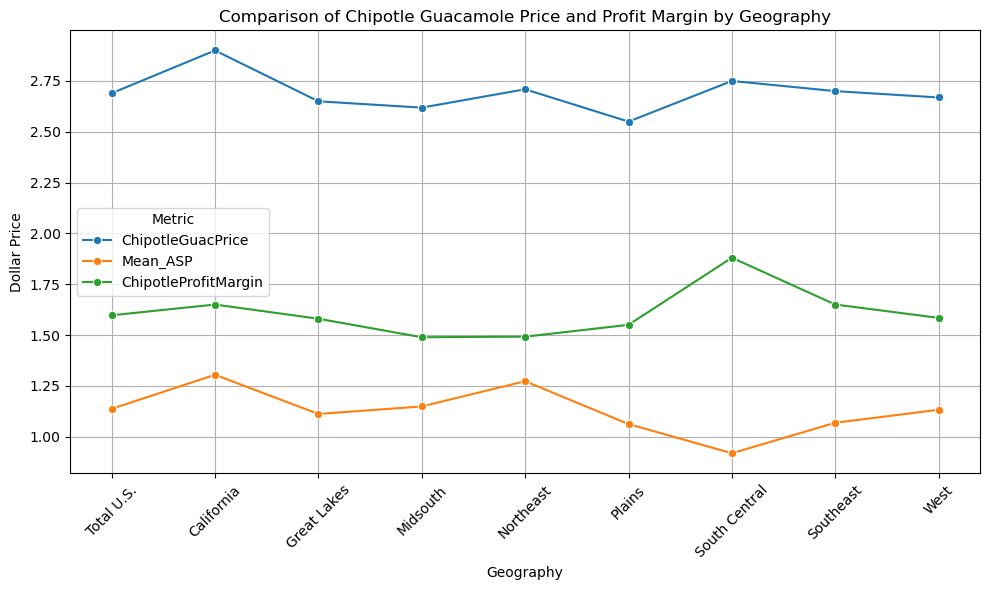

In [26]:
#hasdf
hasdata_df = pd.read_csv('/home/jovyan/479/479GroupProject-1/data/hasstotalmetrics.csv')

# geographies filter 
geographies = ["Total U.S.", "California", "Great Lakes", "Midsouth", 
               "Northeast", "Plains", "South Central", "Southeast", "West"]

filtered_df = hasdata_df[hasdata_df['Geography'].isin(geographies)]

long_data3 = pd.melt(filtered_df,
                     id_vars=['Geography'], 
                     value_vars=['ChipotleGuacPrice', 'Mean_ASP', 'ChipotleProfitMargin'],
                     var_name='Variable', 
                     value_name='Value')

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=long_data3, x='Geography', y='Value', hue='Variable', marker='o')
plt.title('Comparison of Chipotle Guacamole Price and Profit Margin by Geography')
plt.xlabel('Geography')
plt.ylabel('Dollar Price')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
if 'Log_Mean_Dollars' not in hasdata_df.columns or 'Log_Mean_Units' not in hasdata_df.columns:
    raise ValueError('Required columns are missing in the data.')

hasdata_df = hasdata_df.dropna(subset=['Log_Mean_Dollars', 'Log_Mean_Units'])

# prep
X = hasdata_df[['Log_Mean_Dollars']].values.reshape(-1, 1)
y = hasdata_df['Log_Mean_Units'].values

# regression model
model = LinearRegression().fit(X, y)

# coefficients
intercept = model.intercept_
slope = model.coef_[0]

# predict 
y_pred = model.predict(X)
residuals = y - y_pred

n = len(y)
SE = np.sqrt(np.sum(residuals**2) / (n - 2))

mean_X = np.mean(X)
sum_sq_diff_X = np.sum((X - mean_X)**2)
SE_intercept = SE * np.sqrt(1/n + mean_X**2 / sum_sq_diff_X)
SE_slope = SE / np.sqrt(sum_sq_diff_X)

t_stat = stats.t.ppf(1 - 0.025, df=n - 2)

# confidence intervals
conf_int_intercept = (intercept - t_stat * SE_intercept, intercept + t_stat * SE_intercept)
conf_int_slope = (slope - t_stat * SE_slope, slope + t_stat * SE_slope)

# summary
summary = pd.DataFrame({
    'Coefficient': [intercept, slope],
    'Standard Error': [SE_intercept, SE_slope],
    't Statistic': [intercept / SE_intercept, slope / SE_slope],
    'P Value': [2 * (1 - stats.t.cdf(np.abs(intercept / SE_intercept), df=n - 2)),
                2 * (1 - stats.t.cdf(np.abs(slope / SE_slope), df=n - 2))],
    'Conf Int Low': [conf_int_intercept[0], conf_int_slope[0]],
    'Conf Int High': [conf_int_intercept[1], conf_int_slope[1]]
}, index=['Intercept', 'Log_Mean_Dollars'])

print(summary)

# R-squared
r_squared = model.score(X, y)
print(f"r squared = {r_squared:.2f}")

                  Coefficient  Standard Error  t Statistic   P Value  \
Intercept            0.020336        0.231264     0.087935  0.930236   
Log_Mean_Dollars     0.991904        0.013238    74.928065  0.000000   

                  Conf Int Low  Conf Int High  
Intercept            -0.442761       0.483434  
Log_Mean_Dollars      0.965395       1.018413  
r squared = 0.99


In [ ]:
model_data = hasdata_df[['Geography', 'Mean_ASP', 'Mean_Dollars', 'Mean_Units']]
geo_columns = ['Total U.S.', 'California', 'Great Lakes', 'Midsouth', 'Northeast', 'Plains', 'South Central', 'Southeast', 'West']

optimal_asps = {}

# loop geography and fit a linear regression model to predict ASP
for geo in geo_columns:
    geo_data = model_data[model_data['Geography'] == geo]
    
    if not geo_data.empty:
        X = geo_data[['Mean_Units']].values.reshape(-1, 1)
        y = geo_data['Mean_Dollars'] / geo_data['Mean_Units']
        
        # regression model
        model = LinearRegression()
        model.fit(X, y)
        
        # Predict optimal ASP
        optimal_asp = model.predict(X)
        optimal_asps[geo] = optimal_asp.mean()

optimal_asps

{'Total U.S.': 1.1290964923705842,
 'California': 1.2994898482709205,
 'Great Lakes': 1.1015782390320485,
 'Midsouth': 1.1384383930111974,
 'Northeast': 1.2666811727577565,
 'Plains': 1.0481884295771473,
 'South Central': 0.9100187108812879,
 'Southeast': 1.0565419057556154,
 'West': 1.1254528571735405}

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

geo_columns = ['Total U.S.', 'California', 'Great Lakes', 'Midsouth', 'Northeast', 'Plains', 'South Central', 'Southeast', 'West']
model_data = hasdata_df[hasdata_df['Geography'].isin(geo_columns)][['Geography', 'Mean_ASP', 'Mean_Dollars', 'Mean_Units']]

# ddd a external factor feature
model_data['Supply_Drop_Impact'] = 0.40  # assume a 40% increase in prices due to supply drop

# prep
X = model_data[['Mean_Units', 'Supply_Drop_Impact']]
y = model_data['Mean_ASP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model train
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Predict prices 2024
y_pred = model.predict(X_test)

# model evaluation
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Predict 2024
X_2024 = X.copy()  
X_2024['Supply_Drop_Impact'] = 0.40  # Expected impact
y_2024_pred = model.predict(X_2024)

# predictions with geographies
predictions_2024 = pd.DataFrame({'Geography': model_data['Geography'], 'Predicted_ASP_2024': y_2024_pred})

predictions_2024

Mean Squared Error: 0.021386030883279106


,Geography,Predicted_ASP_2024
0,Total U.S.,1.136818
1,California,1.272736
2,Great Lakes,1.111716
3,Midsouth,1.148729
4,Northeast,1.272736
5,Plains,1.062065
6,South Central,0.918446
7,Southeast,1.272736
8,West,1.132268


In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

# Extract relevant columns and filter for required geographies
geo_columns = ['Total U.S.', 'California', 'Great Lakes', 'Midsouth', 'Northeast', 'Plains', 'South Central', 'Southeast', 'West']
model_data = hasdata_df[hasdata_df['Geography'].isin(geo_columns)]

# Add the total avocados used by Chipotle in 2023 as a feature
total_avocados_used_2023 = 318570000
model_data['Avocados_Used_2023'] = total_avocados_used_2023

# Prepare the dataset
optimal_chipotle_prices = {}

for geo in geo_columns:
    geo_data = model_data[model_data['Geography'] == geo]
    
    if not geo_data.empty:
        # Feature: Mean Units, Avocados Used in 2023
        X = geo_data[['Mean_Units']]
        X['Avocados_Used_2023'] = total_avocados_used_2023  # Include the fixed avocado usage
        y = geo_data['ChipotleGuacPrice']
        
        # Check if there are enough samples to split
        if len(X) > 2:
            # Train/Test split
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            # Fit the regression model
            model = LinearRegression()
            model.fit(X_train, y_train)
            
            # Predict and evaluate
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            print(f'Geography: {geo}, Mean Squared Error: {mse}')
        else:
            # Use all data for training if not enough samples for train-test split
            model = LinearRegression()
            model.fit(X, y)
        
        # Predict the optimal ChipotleGuacPrice
        optimal_price = model.predict(X)
        optimal_chipotle_prices[geo] = optimal_price.mean()

# Display the optimal prices for Chipotle Guacamole for each geography
print(optimal_chipotle_prices)

{'Total U.S.': 2.689596395, 'California': 2.9, 'Great Lakes': 2.65, 'Midsouth': 2.61875, 'Northeast': 2.709090909, 'Plains': 2.55, 'South Central': 2.75, 'Southeast': 2.7, 'West': 2.66875}


/tmp/ipykernel_13222/2603711248.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['Avocados_Used_2023'] = total_avocados_used_2023
/tmp/ipykernel_13222/2603711248.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Avocados_Used_2023'] = total_avocados_used_2023  # Include the fixed avocado usage
/tmp/ipykernel_13222/2603711248.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 